# Model Selection: Bias-variance trade-off

We will learn about the bias-variance tradeoff and see it in action using polynomial regression models.

## Tutorial objectives:

Understand difference between test and train data
Compare train and test error for models of varying complexity
Understand how bias-variance tradeoff relates to what model we choose

## Setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#@title Helper functions
def ordinary_least_squares(x, y):
  return np.linalg.inv(x.T @ x) @ x.T @ y

def make_design_matrix(x, order):
  if x.ndim == 1:
    x = x[:, None]

  design_matrix = np.ones((x.shape[0],1))

  for degree in range(1, order+1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix

def solve_poly_reg(x, y, max_order):
  
  theta_hats = {}

  for order in range(max_order+1):

    X = make_design_matrix(x, order)
    this_theta = ordinary_least_squares(X, y)

    theta_hats[order] = this_theta

  return theta_hats

## Section 1: Train vs test data
The data used for the fitting procedure for a given model is the training data. In tutorial 4, we computed MSE on the training data of our polynomial regression models and compared training MSE across models. An additional important type of data is test data. This is held-out data that is not used (in any way) during the fitting procedure. When fitting models, we often want to consider both the train error (the quality of prediction on the training data) and the test error (the quality of prediction on the test data) as we will see in the next section.

We will generate some noisy data for use in this tutorial using a similar process as in Tutorial 4.However, now we will also generate test data. We want to see how our model generalizes beyond the range of values see in the training phase. To accomplish this, we will generate x from a wider range of values ([-3, 3]). We then plot the train and test data together.

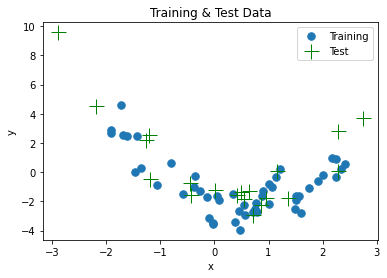

In [6]:

np.random.seed(0)
n_train_samples = 50
x_train = np.random.uniform(-2, 2.5, n_train_samples)
noise = np.random.randn(n_train_samples) 
y_train =  x_train**2 - x_train - 2 + noise

n_test_samples = 20
x_test = np.random.uniform(-3, 3, n_test_samples) 
noise = np.random.randn(n_test_samples)
y_test =  x_test**2 - x_test - 2 + noise

fig, ax = plt.subplots()
plt.title('Training & Test Data')
plt.plot(x_train, y_train, '.', markersize=15, label='Training')
plt.plot(x_test, y_test, 'g+', markersize=15, label='Test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y');

## Section 2: Bias-variance tradeoff
Finding a good model can be difficult. One of the most important concepts to keep in mind when modeling is the bias-variance tradeoff.

Bias is the difference between the prediction of the model and the corresponding true output variables you are trying to predict. Models with high bias will not fit the training data well since the predictions are quite different from the true data. These high bias models are overly simplified - they do not have enough parameters and complexity to accurately capture the patterns in the data and are thus underfitting.

Variance refers to the variability of model predictions for a given input. Essentially, do the model predictions change a lot with changes in the exact training data used? Models with high variance are highly dependent on the exact training data used - they will not generalize well to test data. These high variance models are overfitting to the data.

In essence:

High bias, low variance models have high train and test error.<br>
Low bias, high variance models have low train error, high test error<br>
Low bias, low variance models have low train and test error<br>


As we can see from this list, we ideally want low bias and low variance models! These goals can be in conflict though - models with enough complexity to have low bias also tend to overfit and depend on the training data more. We need to decide on the correct tradeoff.

In this section, we will see the bias-variance tradeoff in action with polynomial regression models of different orders.

<img src="image.png">



In [9]:
max_order = 5
theta_hats = solve_poly_reg(x_train, y_train, max_order)

### Exercise 1: Compute and compare train vs test error
We will use MSE as our error metric again. Compute MSE on training data ($x_{train},y_{train}$) and test data ($x_{test}, y_{test}$) for each polynomial regression model (orders 0-5). Since you already developed code in T4 Exercise 4 for evaluating fit polynomials, we have ported that here into the function evaluate_poly_reg for your use.

Please think about after completing exercise before reading the following text! Do you think the order 0 model has high or low bias? High or low variance? How about the order 5 model?

In [10]:
def evaluate_poly_reg(x, y, theta_hats, max_order):
    mse = np.zeros((max_order + 1))
    for order in range(0, max_order + 1):
      X_design = make_design_matrix(x, order)
      y_hat = np.dot(X_design, theta_hats[order])
      residuals = y - y_hat
      mse[order] = np.mean(residuals ** 2)

    return mse

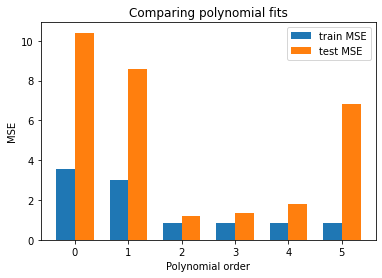

In [12]:
def compute_mse(x_train,x_test,y_train,y_test,theta_hats,max_order):

  mse_train = evaluate_poly_reg(x_train,y_train,theta_hats,max_order)
  mse_test = evaluate_poly_reg(x_test,y_test,theta_hats,max_order)

  return mse_train, mse_test

mse_train, mse_test = compute_mse(x_train, x_test, y_train, y_test, theta_hats, max_order)

fig, ax = plt.subplots()
width = .35

ax.bar(np.arange(max_order + 1) - width / 2, mse_train, width, label="train MSE")
ax.bar(np.arange(max_order + 1) + width / 2, mse_test , width, label="test MSE")

ax.legend()
ax.set(xlabel='Polynomial order', ylabel='MSE', title ='Comparing polynomial fits');

As we can see from the plot above, more complex models (higher order polynomials) have lower MSE for training data. The overly simplified models (orders 0 and 1) have high MSE on the training data. As we add complexity to the model, we go from high bias to low bias.

The MSE on test data follows a different pattern. The best test MSE is for an order 2 model - this makes sense as the data was generated with an order 2 model. Both simpler models and more complex models have higher test MSE.

So to recap:

Order 0 model: High bias, low variance

Order 5 model: Low bias, high variance

Order 2 model: Just right, low bias, low variance

## Summary
Training data is the data used for fitting, test data is held-out data.<br>
We need to strike the right balance between bias and variance. Ideally we want to find a model with optimal model complexity that has both low bias and low variance<br>
Too complex models have low bias and high variance.<br>
Too simple models have high bias and low variance. <br>

Note

Bias and variance are very important concepts in modern machine learning, but it has recently been observed that they do not necessaruly trade off (see for example the phenomenon and theory of "double descent")